In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
human_df = pd.read_csv('./tcga_data_normalized.csv')
human_df.index = human_df['Unnamed: 0']
human_df = human_df.drop('Unnamed: 0', axis=1)
human_df.index.name = "index"

In [23]:
mouse_df = pd.read_csv('./tismo_data_normalized.csv')
mouse_df.index = mouse_df['Unnamed: 0']
mouse_df = mouse_df.drop('Unnamed: 0', axis=1)
mouse_df.index.name = "index"

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
X_human_hs = human_df.iloc[:,:-1]
y_human_hs = human_df['CANCER_TYPE']

X_mouse_hs = mouse_df.iloc[:,:-1]
y_mouse_hs = mouse_df['CANCER_TYPE']

In [29]:
type_mapping = {
    'BLCA': 0,
    'BRCA': 1,
    'COAD': 2,
    'GBM': 3,
    'HNSC': 4,
    'KIRC': 5,
    'LIHC': 6,
    'LUAD': 7,
    'OV': 8,
    'PAAD': 9,
    'PRAD': 10,
    'SARC': 11,
    'SKCM': 12,
    'STAD': 13
}

In [30]:
y_human_hs_mapped = y_human_hs.map(type_mapping)
y_mouse_hs_mapped = y_mouse_hs.map(type_mapping)

In [31]:
X_human_hs_train, X_human_hs_test, y_human_hs_train, y_human_hs_test = train_test_split(X_human_hs, y_human_hs_mapped, test_size=0.3, random_state=42)

In [32]:
xgb_model_human_hs = XGBClassifier(n_estimators=100)
xgb_model_human_hs.fit(X_human_hs_train, y_human_hs_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [35]:
y_predictions_test = xgb_model_human_hs.predict(X_human_hs_test)
predictions_xgb_human_test = [round(value) for value in y_predictions_test]
accuracy_human_test = accuracy_score(y_human_hs_test, predictions_xgb_human_test)
print(f"Accuracy on human test set: {accuracy_human_test:.2f}")

Accuracy on human test set: 0.98


In [36]:
y_predictions_mouse_hs = xgb_model_human_hs.predict(X_mouse_hs)
predictions_xgb_mouse_hs = [round(value) for value in y_predictions_mouse_hs]

accuracy = accuracy_score(y_mouse_hs_mapped, predictions_xgb_mouse_hs)
print("Accuracy of Human Model on All X_train_hs mouse data: %.2f%%" % (accuracy * 100.0))

Accuracy of Human Model on All X_train_hs mouse data: 39.82%


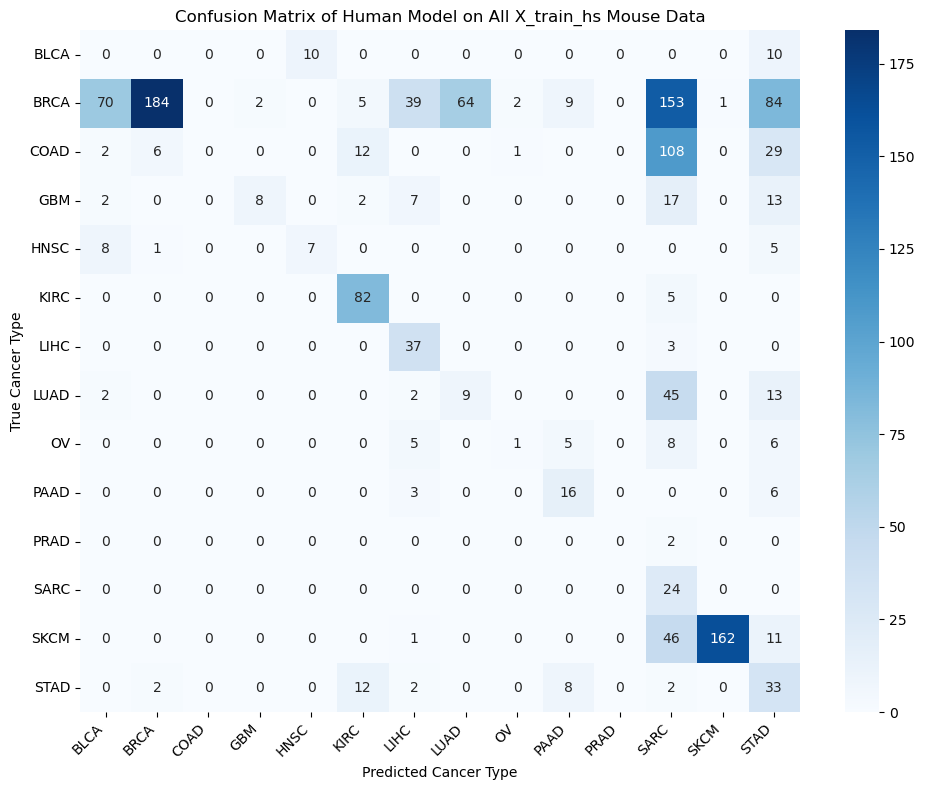

In [34]:
labels = list(type_mapping.values())  # [0, 1, ..., 13]
cancer_names = [k for k, v in sorted(type_mapping.items(), key=lambda item: item[1])]

cm = confusion_matrix(y_mouse_hs_mapped, predictions_xgb_mouse_hs, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer_names, yticklabels=cancer_names)
plt.title('Confusion Matrix of Human Model on All X_train_hs Mouse Data')
plt.xlabel('Predicted Cancer Type')
plt.ylabel('True Cancer Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()